In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [14]:
df = pd.read_csv("static/invasion.csv")

X = df.drop(['class'], axis=1)
y = df['class']

clf_rf = RandomForestClassifier(random_state=0)
params = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 'min_samples_leaf': range(1, 8),
          'min_samples_split': range(2, 10, 2)}
grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1)
grid_search_cv_clf.fit(X, y)
grid_search_cv_clf.best_params_

# test_X = pd.read_csv("static/operative_information.csv")
# grid_search_cv_clf.fit(X, y)
# grid_search_cv_clf.predict(test_X).sum()
# pred = grid_search_cv_clf.predict(X)

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [18]:
params = {'n_estimators': [10], 'max_depth': [3], 'min_samples_leaf': [2],
          'min_samples_split': [2]}
grid_search_cv_clf = RandomForestClassifier(random_state=0, n_estimators=10, max_depth=3, min_samples_leaf=2,
          min_samples_split=2)
test_X = pd.read_csv("static/operative_information.csv")
grid_search_cv_clf.fit(X, y)
pred = grid_search_cv_clf.predict(test_X)
pd.Series(pred).value_counts()

fighter      675
transport    595
cruiser      230
Name: count, dtype: int64

<Axes: >

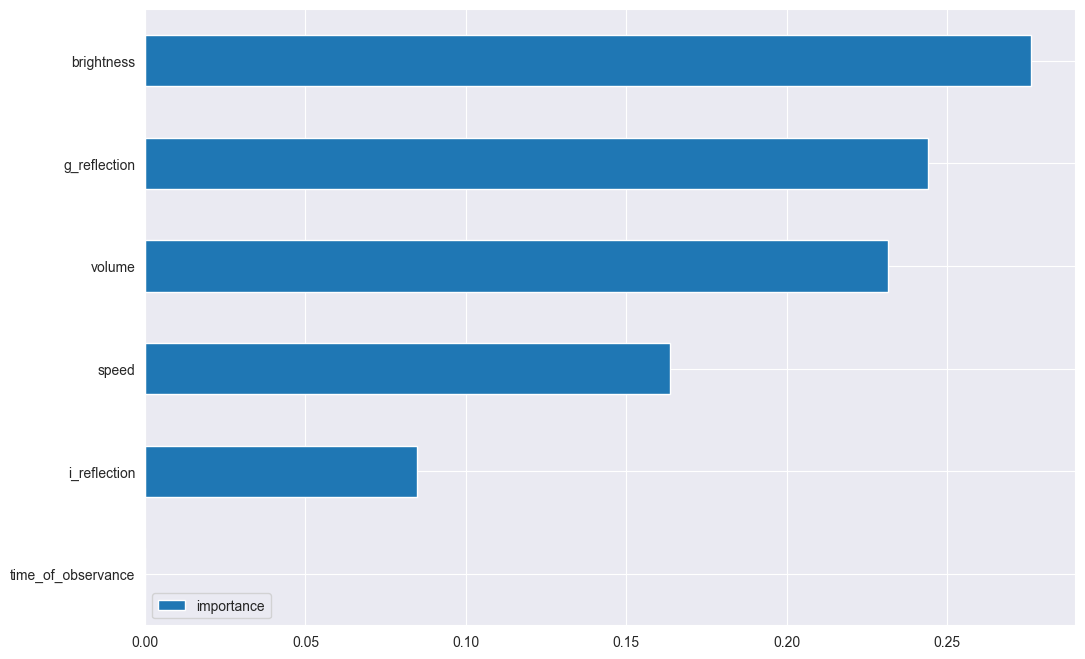

In [19]:
imp = pd.DataFrame(grid_search_cv_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [29]:
df = pd.read_csv("static/space_can_be_a_dangerous_place.csv")
X = df.drop(['dangerous'], axis=1)
y = df['dangerous']

In [30]:
clf_rf = RandomForestClassifier(random_state=0)
# params = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 'min_samples_leaf': range(1, 8),
#           'min_samples_split': range(2, 10, 2)}
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5 , 7, 10]}
grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1)
grid_search_cv_clf.fit(X, y)
grid_search_cv_clf.best_params_

KeyboardInterrupt: 

<Axes: >

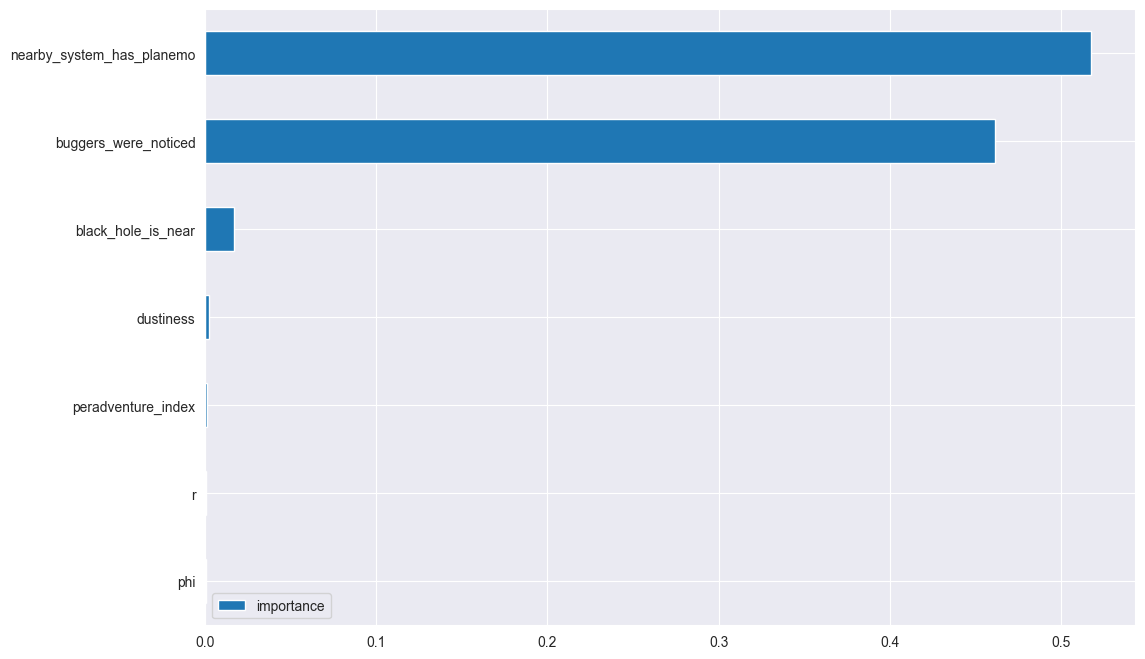

In [31]:
grid_search_cv_clf = RandomForestClassifier(random_state=0, n_estimators=10, max_depth=3, min_samples_leaf=2,
                                            min_samples_split=2)
grid_search_cv_clf.fit(X, y)
imp = pd.DataFrame(grid_search_cv_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))